In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from collections import deque
#from multiprocessing import deque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from numpy import savetxt
import pickle

In [2]:
df = pd.read_csv('../assignment 3/data/q2_dataset.csv' ,sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
df = df[::-1].reset_index(drop=True)

data = df.iloc[:,1:]
data['target'] = data['Open'].shift(-1)

feature_columns = ['Volume', 'Open', 'High', 'Low']

data.dropna(inplace=True)

In [3]:
#Preparing data
sequence_data = []
sequences = deque(maxlen = 3)
for entry, target in zip(data[feature_columns].values, data['target'].values):
    sequences.append(entry)
    if len(sequences) == 3:
        sequence_data.append([np.array(sequences), target])

X, y = [], []
for seq, tar in sequence_data:
    X.append(seq)
    y.append(tar)

X = np.array(X)
y = np.array(y)


X=X.reshape(1256,12)
y = y.reshape(1256,1)

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train_data_RNN = np.concatenate((X_train, y_train), axis=1)
test_data_RNN = np.concatenate((X_test, y_test), axis=1)


savetxt('../assignment 3/data/train_data_RNN.csv', train_data_RNN, delimiter=',')
savetxt('../assignment 3/data/test_data_RNN.csv', test_data_RNN, delimiter=',')






In [8]:

#Loading the train data

df = np.genfromtxt('../assignment 3/data/train_data_RNN.csv',delimiter=',')
y_train = df[:, -1].reshape(879,1)
X_train =  df[:, :-1]

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_train = X_train.reshape(879, 4, 3)

In [9]:
model = Sequential()

model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(None, 3)))
model.add(Dropout(0.4))

model.add(LSTM(128))

model.add(Dropout(0.4))

model.add(Dense(1, activation="linear"))
model.compile(loss="mean_absolute_error", optimizer='adam')

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, None, 512)         532480    
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               328192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 860,801
Trainable params: 860,801
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
batch_size = 32
epochs = 1
training = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-07-17 22:25:18.550497: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-17 22:25:18.550780: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - ETA: 0s - loss: 174.8828WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x17d6ef700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25/25 [==============================] - 1s 25ms/step - loss: 174.6726 - val_loss: 153.1445


In [23]:
df = np.genfromtxt('./data/test_data_RNN.csv',delimiter=',')
y_test = df[:, -1].reshape(377,1)
X_test =  df[:, :-1]

 # 3. Run prediction on the test data and output required plot and loss

scaler = preprocessing.MinMaxScaler()
X_test = scaler.fit_transform(X_test)

X_test = X_test.reshape(377, 4, 3)


mae = model.evaluate(X_test, y_test, verbose=0)
print("Loss =", mae)

y_pred = model.predict(X_test)

plt.figure(figsize = (15,5))
plt.plot(y_test, c='k')
plt.plot(y_pred, c='c')
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend(["Actual P", "Predicted Price"])
plt.show()

['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [24]:
data['target']= data['Open']
data['Date'] =pd.to_datetime(data.Date)
data=data.sort_values(by='Date')
data.head()

,Date,Close/Last,Volume,Open,High,Low,target
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72


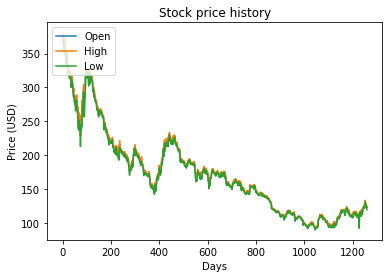

In [25]:
plt.figure()
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
#plt.plot(data["Close"])
plt.title('Stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low'], loc='upper left')
plt.show()

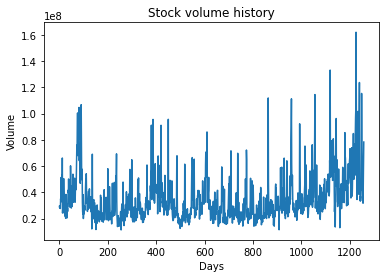

In [26]:
plt.figure()
plt.plot(data["Volume"])
plt.title('Stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [27]:
import seaborn as sns
# defining function for plotting correlation heatmap
def plot_heatmap(correlation):
    plt.figure(figsize=(15, 8))
    ax = sns.heatmap(correlation,annot=True,fmt='.3f',linewidths=0.3,annot_kws={"size": 18})
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12) 
    plt.title('Correlation between features', fontsize=20)
    ax.figure.axes[-1].tick_params(labelsize=18) # To increase fontsize of colorbar ticks
    lim = len(correlation.columns)
    ax.set_ylim([0,lim]) # to make the map display correctly without trimming the edges
    plt.show()
    return

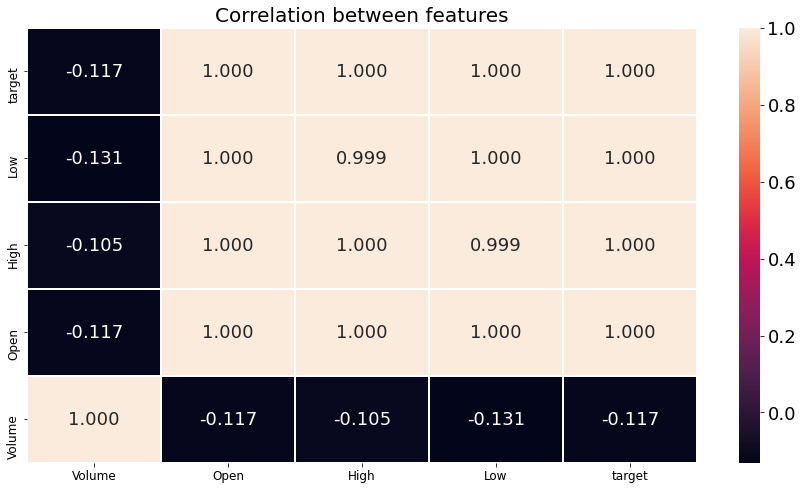

In [28]:
plot_heatmap(data.corr())

In [29]:
#create features using columns from previous 3 days
data['Volume_t-3'] = data.shift(3)['Volume']
data['Volume_t-2'] = data.shift(2)['Volume']
data['Volume_t-1'] = data.shift(1)['Volume']
data['Open_t-3'] = data.shift(3)['Open']
data['Open_t-2'] = data.shift(2)['Open']
data['Open_t-1'] = data.shift(1)['Open']
data['High_t-3'] = data.shift(3)['High']
data['High_t-2'] = data.shift(2)['High']
data['High_t-1'] = data.shift(1)['High']
data['Low_t-3'] = data.shift(3)['Low']
data['Low_t-2'] = data.shift(2)['Low']
data['Low_t-1'] = data.shift(1)['Low']
data['target']= data['Open']
data.head()

,Date,Close/Last,Volume,Open,High,Low,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [31]:
data = data.drop(['Close/Last','Volume','Open','High','Low'], axis = 1)
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1258,2015-07-09,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
1256,2015-07-13,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
1255,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [32]:
data.isna().sum()

Date          0
target        0
Volume_t-3    3
Volume_t-2    2
Volume_t-1    1
Open_t-3      3
Open_t-2      2
Open_t-1      1
High_t-3      3
High_t-2      2
High_t-1      1
Low_t-3       3
Low_t-2       2
Low_t-1       1
dtype: int64

In [33]:
#drop columns with null values
data = data.dropna()
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1255,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04
1253,2015-07-16,127.74,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58
1252,2015-07-17,129.08,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35
1251,2015-07-20,130.97,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31


In [34]:
list(data.columns)

['Date',
 'target',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1']

In [35]:
data = data[[
 'Date',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1', 
 'target']]
data.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
1255,2015-07-14,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32,126.04
1254,2015-07-15,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04,125.72
1253,2015-07-16,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58,127.74
1252,2015-07-17,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35,129.08
1251,2015-07-20,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31,130.97


## Dataset Creation

We sorted the dataset in ascending order, since our intention is to predict the opening price from the **previous** three days. Using the pandas shift function which shifts the index by desired number of periods, we were able to create new features by specifying the index that was needed. For example, to get the Volume from three days prior, we shift by 3 - data.shift(3)['Volume']. This process was repeated for all necessary columns and indices. 


In [36]:
len(data)

1256

In [37]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
train, test = train_test_split(data, test_size=0.30, random_state=0)
#save the data
train.to_csv('train_data_RNN.csv',index=False)
test.to_csv('test_data_RNN.csv',index=False)


In [38]:
type(train)

pandas.core.frame.DataFrame

In [39]:
train.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
566,2018-04-09,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20,169.88
121,2020-01-14,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15,316.70
354,2019-02-11,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42,171.05
676,2017-10-27,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78,159.29
888,2016-12-23,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64,115.59


In [40]:
data_train = pd.read_csv('train_data_RNN.csv')
data_test = pd.read_csv('test_data_RNN.csv')

## Preprocessing

**Scaling the data**

The range of the data is widely varied. The values of Volume are very high and could skew the model. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently. We utilise the Minmax scaler to keep feature values between 0 and 1. 

Scaled values of X are created using the following formula:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

We also tried the Standard scaler, however there was no significant difference in training or test loss with this scaler. 

**Splitting Features and Target**

The target is the opening price of the day we wish to predict. 

In [41]:
#separate features and target
X_train = data_train.drop(['Date','target'], axis = 1)
y_train = data_train['target']
X_test_date = data_test
X_test = data_test.drop(['Date','target'], axis = 1)
y_test = data_test['target']


In [42]:
X_train


,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20
1,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15
2,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42
3,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78
4,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64
...,...,...,...,...,...,...,...,...,...,...,...,...
874,20182050.0,20670830.0,15955820.0,189.69,191.78,190.68,192.55,192.43,191.96,189.69,190.17,189.56
875,36487930.0,38016810.0,52954070.0,211.15,216.88,219.05,215.18,220.45,222.36,209.27,216.62,216.81
876,28803760.0,33511990.0,36486560.0,303.22,305.64,308.10,305.17,310.35,317.05,301.97,304.29,307.24
877,35907770.0,25402270.0,21983410.0,151.78,153.80,153.89,153.92,154.72,154.28,151.69,153.54,152.70


In [43]:
X_test


,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70
1,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62
2,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37
3,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77
4,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12
...,...,...,...,...,...,...,...,...,...,...,...,...
372,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80
373,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74
374,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33
375,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43


In [44]:
y_train

0      169.88
1      316.70
2      171.05
3      159.29
4      115.59
        ...  
874    192.45
875    209.55
876    317.83
877    153.21
878    167.88
Name: target, Length: 879, dtype: float64

In [45]:
y_test

0      132.85
1      144.49
2      116.44
3      191.81
4      108.91
        ...  
372    112.02
373    205.53
374    148.82
375    273.61
376    284.82
Name: target, Length: 377, dtype: float64

In [46]:
X_test_date

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
0,2015-07-21,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,132.85
1,2017-06-28,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62,144.49
2,2015-09-25,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37,116.44
3,2019-06-10,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77,191.81
4,2016-04-08,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12,108.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2015-12-17,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80,112.02
373,2019-08-02,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74,205.53
374,2017-07-17,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33,148.82
375,2020-04-22,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43,273.61


In [47]:
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
#saving the scaler to apply it on the test dataset
import pickle
with open('scaler_RNN_model','wb') as file_pick:
    pickle.dump(scaler,file_pick)

In [49]:
#numpy array conversion
X_train=np.array(X_train)
X_test=np.array(X_test)

In [50]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [51]:
X_train.shape[0],X_train.shape[1]


(879, 12)

In [52]:
X_test.shape[0],X_test.shape[1]


(377, 12)

## Design Steps

MODEL 1(Udacity)

LSTM LAYER 1 - width of 32
Dropout 0.2
LSTM LAYER 2 - 16 units
Dropout 0.2
Dense Layer

SHOW TRAINING LOSS FOR THAT AND DO THE OTHER ONE UNDER

MODEL 2 (Medium)

LSTM LAYER 1 - 50 units
Dropout 0.2
LSTM LAYER 2 - 50 units
Dropout 0.2
LSTM LAYER 2 - 50 units
Dropout 0.2
Dense Layer

MODEL 3(IEEE Paper for amazon spot prediction pricing)

LSTM LAYER 1 - width of 32
Dropout 0.2
LSTM LAYER 2 - 32 units
Dropout 0.2
Dense Layer

TALK ABOUT ADAGRAD OPTIMIZER AND SHOW REASONS WHY IT WAS SO BAD

mean_squared_error' has been used as loss function
    Optimizer: Here adam optimizer has been used. Adam is an adaptive
    learning rate optimization algorithm that’s been designed specifically for
    training deep neural networks.
    Accuracy is not used as a metric because this is a regression model.

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Using TensorFlow backend.


In [81]:
model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(12,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50,return_sequences=True),
	tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(50),
	tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [82]:
model.compile(loss='mean_squared_error',optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 12, 50)            10400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 50)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 12, 50)            20200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 50)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 12, 50)            20200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 12, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)               

In [84]:
%%time
history = model.fit(X_train,y_train,validation_split=0.05,epochs=1500,batch_size=32,verbose=1)


Epoch 1/1500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/27 [========================>.....] - ETA: 0s - loss: 31463.1947WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2a9546160> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and atta

Epoch 59/1500
27/27 [==============================] - 0s 6ms/step - loss: 12390.7807 - val_loss: 12058.8184
Epoch 60/1500
27/27 [==============================] - 0s 5ms/step - loss: 11997.2295 - val_loss: 11623.4648
Epoch 61/1500
27/27 [==============================] - 0s 5ms/step - loss: 11829.3526 - val_loss: 11555.8711
Epoch 62/1500
27/27 [==============================] - 0s 5ms/step - loss: 11093.5237 - val_loss: 11661.2285
Epoch 63/1500
27/27 [==============================] - 0s 5ms/step - loss: 11726.0784 - val_loss: 10983.0840
Epoch 64/1500
27/27 [==============================] - 0s 5ms/step - loss: 11270.8846 - val_loss: 11389.8164
Epoch 65/1500
27/27 [==============================] - 0s 5ms/step - loss: 10502.5028 - val_loss: 11234.2969
Epoch 66/1500
27/27 [==============================] - 0s 6ms/step - loss: 10650.8049 - val_loss: 10406.9746
Epoch 67/1500
27/27 [==============================] - 0s 6ms/step - loss: 9871.6329 - val_loss: 10192.1475
Epoch 68/1500
27/27 

27/27 [==============================] - 0s 5ms/step - loss: 4793.9180 - val_loss: 4416.1182
Epoch 136/1500
27/27 [==============================] - 0s 5ms/step - loss: 5259.4978 - val_loss: 4185.8105
Epoch 137/1500
27/27 [==============================] - 0s 5ms/step - loss: 4666.7834 - val_loss: 3583.8928
Epoch 138/1500
27/27 [==============================] - 0s 5ms/step - loss: 4832.9050 - val_loss: 4109.1904
Epoch 139/1500
27/27 [==============================] - 0s 5ms/step - loss: 4547.7699 - val_loss: 4271.2109
Epoch 140/1500
27/27 [==============================] - 0s 5ms/step - loss: 4695.1450 - val_loss: 3927.4438
Epoch 141/1500
27/27 [==============================] - 0s 5ms/step - loss: 4688.4069 - val_loss: 3924.4326
Epoch 142/1500
27/27 [==============================] - 0s 5ms/step - loss: 4625.9852 - val_loss: 3855.2236
Epoch 143/1500
27/27 [==============================] - 0s 5ms/step - loss: 4863.7441 - val_loss: 3863.1562
Epoch 144/1500
27/27 [=====================

Epoch 211/1500
27/27 [==============================] - 0s 6ms/step - loss: 4306.0528 - val_loss: 2900.7930
Epoch 212/1500
27/27 [==============================] - 0s 5ms/step - loss: 4371.0415 - val_loss: 3126.2510
Epoch 213/1500
27/27 [==============================] - 0s 5ms/step - loss: 4131.5078 - val_loss: 3318.8604
Epoch 214/1500
27/27 [==============================] - 0s 5ms/step - loss: 4130.9527 - val_loss: 3184.6094
Epoch 215/1500
27/27 [==============================] - 0s 5ms/step - loss: 4267.0220 - val_loss: 3306.4658
Epoch 216/1500
27/27 [==============================] - 0s 5ms/step - loss: 3876.0264 - val_loss: 3479.3877
Epoch 217/1500
27/27 [==============================] - 0s 6ms/step - loss: 4422.5309 - val_loss: 3130.2671
Epoch 218/1500
27/27 [==============================] - 0s 6ms/step - loss: 4115.8521 - val_loss: 3340.3877
Epoch 219/1500
27/27 [==============================] - 0s 6ms/step - loss: 3859.0030 - val_loss: 3053.4841
Epoch 220/1500
27/27 [======

Epoch 287/1500
27/27 [==============================] - 0s 5ms/step - loss: 4406.1653 - val_loss: 3442.4724
Epoch 288/1500
27/27 [==============================] - 0s 5ms/step - loss: 3890.4598 - val_loss: 3561.2983
Epoch 289/1500
27/27 [==============================] - 0s 5ms/step - loss: 4186.5206 - val_loss: 3032.6914
Epoch 290/1500
27/27 [==============================] - 0s 5ms/step - loss: 4278.4782 - val_loss: 3049.9946
Epoch 291/1500
27/27 [==============================] - 0s 5ms/step - loss: 4716.8881 - val_loss: 3112.0359
Epoch 292/1500
27/27 [==============================] - 0s 5ms/step - loss: 4040.3263 - val_loss: 3027.4880
Epoch 293/1500
27/27 [==============================] - 0s 5ms/step - loss: 4236.4815 - val_loss: 3164.6860
Epoch 294/1500
27/27 [==============================] - 0s 5ms/step - loss: 4067.1938 - val_loss: 3260.2732
Epoch 295/1500
27/27 [==============================] - 0s 5ms/step - loss: 4153.3374 - val_loss: 2982.2976
Epoch 296/1500
27/27 [======

Epoch 363/1500
27/27 [==============================] - 0s 5ms/step - loss: 4123.0039 - val_loss: 3358.3350
Epoch 364/1500
27/27 [==============================] - 0s 5ms/step - loss: 3997.5063 - val_loss: 3050.3445
Epoch 365/1500
27/27 [==============================] - 0s 5ms/step - loss: 4204.5090 - val_loss: 2908.0986
Epoch 366/1500
27/27 [==============================] - 0s 5ms/step - loss: 4234.9705 - val_loss: 3010.6858
Epoch 367/1500
27/27 [==============================] - 0s 5ms/step - loss: 4337.8742 - val_loss: 2962.5193
Epoch 368/1500
27/27 [==============================] - 0s 5ms/step - loss: 4062.2322 - val_loss: 3136.4568
Epoch 369/1500
27/27 [==============================] - 0s 5ms/step - loss: 4172.1023 - val_loss: 2801.3655
Epoch 370/1500
27/27 [==============================] - 0s 6ms/step - loss: 4294.2914 - val_loss: 2999.1787
Epoch 371/1500
27/27 [==============================] - 0s 5ms/step - loss: 4371.4292 - val_loss: 3106.4468
Epoch 372/1500
27/27 [======

Epoch 439/1500
27/27 [==============================] - 0s 5ms/step - loss: 3985.4634 - val_loss: 2584.7993
Epoch 440/1500
27/27 [==============================] - 0s 5ms/step - loss: 4158.2867 - val_loss: 3065.6875
Epoch 441/1500
27/27 [==============================] - 0s 5ms/step - loss: 4117.6638 - val_loss: 3214.8174
Epoch 442/1500
27/27 [==============================] - 0s 5ms/step - loss: 4297.0344 - val_loss: 3277.3298
Epoch 443/1500
27/27 [==============================] - 0s 5ms/step - loss: 4133.5712 - val_loss: 3517.5315
Epoch 444/1500
27/27 [==============================] - 0s 5ms/step - loss: 4070.1260 - val_loss: 3072.0718
Epoch 445/1500
27/27 [==============================] - 0s 5ms/step - loss: 3886.5254 - val_loss: 3323.2080
Epoch 446/1500
27/27 [==============================] - 0s 5ms/step - loss: 4393.9448 - val_loss: 3238.3752
Epoch 447/1500
27/27 [==============================] - 0s 5ms/step - loss: 4143.9342 - val_loss: 3076.9958
Epoch 448/1500
27/27 [======

Epoch 515/1500
27/27 [==============================] - 0s 5ms/step - loss: 4438.1829 - val_loss: 3193.2529
Epoch 516/1500
27/27 [==============================] - 0s 5ms/step - loss: 3936.7658 - val_loss: 3189.1321
Epoch 517/1500
27/27 [==============================] - 0s 5ms/step - loss: 4005.8152 - val_loss: 3488.0889
Epoch 518/1500
27/27 [==============================] - 0s 5ms/step - loss: 4362.9161 - val_loss: 3272.8740
Epoch 519/1500
27/27 [==============================] - 0s 5ms/step - loss: 4416.3082 - val_loss: 2864.7217
Epoch 520/1500
27/27 [==============================] - 0s 5ms/step - loss: 3874.8186 - val_loss: 3331.0991
Epoch 521/1500
27/27 [==============================] - 0s 5ms/step - loss: 4084.6981 - val_loss: 3485.5327
Epoch 522/1500
27/27 [==============================] - 0s 5ms/step - loss: 4157.0016 - val_loss: 3122.8655
Epoch 523/1500
27/27 [==============================] - 0s 5ms/step - loss: 4003.5624 - val_loss: 3142.4634
Epoch 524/1500
27/27 [======

Epoch 591/1500
27/27 [==============================] - 0s 5ms/step - loss: 1057.0239 - val_loss: 3999.9705
Epoch 592/1500
27/27 [==============================] - 0s 5ms/step - loss: 867.3438 - val_loss: 4689.9253
Epoch 593/1500
27/27 [==============================] - 0s 5ms/step - loss: 1024.4559 - val_loss: 5206.2207
Epoch 594/1500
27/27 [==============================] - 0s 5ms/step - loss: 921.8947 - val_loss: 5426.0073
Epoch 595/1500
27/27 [==============================] - 0s 5ms/step - loss: 912.2747 - val_loss: 4313.1392
Epoch 596/1500
27/27 [==============================] - 0s 5ms/step - loss: 943.8252 - val_loss: 5189.9199
Epoch 597/1500
27/27 [==============================] - 0s 5ms/step - loss: 895.8036 - val_loss: 5183.7109
Epoch 598/1500
27/27 [==============================] - 0s 5ms/step - loss: 1044.9439 - val_loss: 3729.6953
Epoch 599/1500
27/27 [==============================] - 0s 5ms/step - loss: 1109.9377 - val_loss: 5705.3296
Epoch 600/1500
27/27 [===========

27/27 [==============================] - 0s 5ms/step - loss: 356.1393 - val_loss: 5759.7153
Epoch 744/1500
27/27 [==============================] - 0s 5ms/step - loss: 354.2803 - val_loss: 4774.7427
Epoch 745/1500
27/27 [==============================] - 0s 5ms/step - loss: 410.8097 - val_loss: 5412.6250
Epoch 746/1500
27/27 [==============================] - 0s 5ms/step - loss: 346.0889 - val_loss: 5833.6362
Epoch 747/1500
27/27 [==============================] - 0s 5ms/step - loss: 439.0398 - val_loss: 5087.8643
Epoch 748/1500
27/27 [==============================] - 0s 5ms/step - loss: 376.3182 - val_loss: 5654.0249
Epoch 749/1500
27/27 [==============================] - 0s 5ms/step - loss: 373.2917 - val_loss: 7306.6675
Epoch 750/1500
27/27 [==============================] - 0s 5ms/step - loss: 366.5778 - val_loss: 6669.5908
Epoch 751/1500
27/27 [==============================] - 0s 5ms/step - loss: 366.2167 - val_loss: 5273.6543
Epoch 752/1500
27/27 [==============================

27/27 [==============================] - 0s 6ms/step - loss: 262.5152 - val_loss: 5058.6187
Epoch 896/1500
27/27 [==============================] - 0s 5ms/step - loss: 285.7329 - val_loss: 6381.6953
Epoch 897/1500
27/27 [==============================] - 0s 5ms/step - loss: 278.8452 - val_loss: 5949.5269
Epoch 898/1500
27/27 [==============================] - 0s 5ms/step - loss: 299.1622 - val_loss: 4860.3950
Epoch 899/1500
27/27 [==============================] - 0s 5ms/step - loss: 294.5995 - val_loss: 5175.3071
Epoch 900/1500
27/27 [==============================] - 0s 5ms/step - loss: 294.2600 - val_loss: 8156.9614
Epoch 901/1500
27/27 [==============================] - 0s 5ms/step - loss: 388.6644 - val_loss: 5296.2378
Epoch 902/1500
27/27 [==============================] - 0s 5ms/step - loss: 310.2596 - val_loss: 4581.3892
Epoch 903/1500
27/27 [==============================] - 0s 7ms/step - loss: 304.3968 - val_loss: 5496.2910
Epoch 904/1500
27/27 [==============================

27/27 [==============================] - 0s 6ms/step - loss: 273.0743 - val_loss: 4824.6406
Epoch 1048/1500
27/27 [==============================] - 0s 5ms/step - loss: 302.8642 - val_loss: 5705.9619
Epoch 1049/1500
27/27 [==============================] - 0s 6ms/step - loss: 268.9596 - val_loss: 5531.8979
Epoch 1050/1500
27/27 [==============================] - 0s 6ms/step - loss: 268.4677 - val_loss: 8157.0425
Epoch 1051/1500
27/27 [==============================] - 0s 5ms/step - loss: 276.7411 - val_loss: 7993.7217
Epoch 1052/1500
27/27 [==============================] - 0s 6ms/step - loss: 290.2220 - val_loss: 7887.5083
Epoch 1053/1500
27/27 [==============================] - 0s 6ms/step - loss: 284.7064 - val_loss: 7223.6592
Epoch 1054/1500
27/27 [==============================] - 0s 5ms/step - loss: 276.8971 - val_loss: 7298.7471
Epoch 1055/1500
27/27 [==============================] - 0s 5ms/step - loss: 259.0322 - val_loss: 7629.1738
Epoch 1056/1500
27/27 [=====================

27/27 [==============================] - 0s 5ms/step - loss: 285.8123 - val_loss: 10233.1367
Epoch 1124/1500
27/27 [==============================] - 0s 6ms/step - loss: 321.0769 - val_loss: 6746.1333
Epoch 1125/1500
27/27 [==============================] - 0s 6ms/step - loss: 291.7718 - val_loss: 6538.4434
Epoch 1126/1500
27/27 [==============================] - 0s 5ms/step - loss: 301.1293 - val_loss: 3749.6963
Epoch 1127/1500
27/27 [==============================] - 0s 5ms/step - loss: 322.1818 - val_loss: 4091.0203
Epoch 1128/1500
27/27 [==============================] - 0s 5ms/step - loss: 320.8801 - val_loss: 2951.7942
Epoch 1129/1500
27/27 [==============================] - 0s 5ms/step - loss: 284.2188 - val_loss: 7044.0317
Epoch 1130/1500
27/27 [==============================] - 0s 5ms/step - loss: 295.1175 - val_loss: 2997.1924
Epoch 1131/1500
27/27 [==============================] - 0s 6ms/step - loss: 290.2690 - val_loss: 7351.7231
Epoch 1132/1500
27/27 [====================

Epoch 1199/1500
27/27 [==============================] - 0s 6ms/step - loss: 298.2337 - val_loss: 3665.2698
Epoch 1200/1500
27/27 [==============================] - 0s 5ms/step - loss: 270.1458 - val_loss: 6654.8364
Epoch 1201/1500
27/27 [==============================] - 0s 6ms/step - loss: 247.9409 - val_loss: 7283.8765
Epoch 1202/1500
27/27 [==============================] - 0s 6ms/step - loss: 323.9807 - val_loss: 7718.8628
Epoch 1203/1500
27/27 [==============================] - 0s 5ms/step - loss: 263.1446 - val_loss: 3392.9819
Epoch 1204/1500
27/27 [==============================] - 0s 6ms/step - loss: 276.2853 - val_loss: 6501.1831
Epoch 1205/1500
27/27 [==============================] - 0s 6ms/step - loss: 258.7584 - val_loss: 5200.4497
Epoch 1206/1500
27/27 [==============================] - 0s 5ms/step - loss: 297.0437 - val_loss: 4532.7188
Epoch 1207/1500
27/27 [==============================] - 0s 5ms/step - loss: 248.2675 - val_loss: 6062.3940
Epoch 1208/1500
27/27 [=====

Epoch 1275/1500
27/27 [==============================] - 0s 6ms/step - loss: 298.1223 - val_loss: 6246.5864
Epoch 1276/1500
27/27 [==============================] - 0s 5ms/step - loss: 263.7587 - val_loss: 6159.8281
Epoch 1277/1500
27/27 [==============================] - 0s 6ms/step - loss: 252.0578 - val_loss: 5649.9707
Epoch 1278/1500
27/27 [==============================] - 0s 6ms/step - loss: 330.6495 - val_loss: 6004.0879
Epoch 1279/1500
27/27 [==============================] - 0s 5ms/step - loss: 290.2422 - val_loss: 5290.7817
Epoch 1280/1500
27/27 [==============================] - 0s 5ms/step - loss: 275.8041 - val_loss: 5129.9912
Epoch 1281/1500
27/27 [==============================] - 0s 6ms/step - loss: 284.9214 - val_loss: 4537.3887
Epoch 1282/1500
27/27 [==============================] - 0s 5ms/step - loss: 303.4305 - val_loss: 5686.3149
Epoch 1283/1500
27/27 [==============================] - 0s 5ms/step - loss: 311.1967 - val_loss: 6012.3188
Epoch 1284/1500
27/27 [=====

Epoch 1351/1500
27/27 [==============================] - 0s 5ms/step - loss: 259.5284 - val_loss: 6614.5435
Epoch 1352/1500
27/27 [==============================] - 0s 5ms/step - loss: 269.1868 - val_loss: 7925.7329
Epoch 1353/1500
27/27 [==============================] - 0s 5ms/step - loss: 303.4363 - val_loss: 5555.7310
Epoch 1354/1500
27/27 [==============================] - 0s 5ms/step - loss: 231.3228 - val_loss: 6751.1660
Epoch 1355/1500
27/27 [==============================] - 0s 5ms/step - loss: 245.5452 - val_loss: 5690.3613
Epoch 1356/1500
27/27 [==============================] - 0s 5ms/step - loss: 282.8373 - val_loss: 4585.7983
Epoch 1357/1500
27/27 [==============================] - 0s 6ms/step - loss: 291.9279 - val_loss: 7643.8047
Epoch 1358/1500
27/27 [==============================] - 0s 5ms/step - loss: 270.1179 - val_loss: 7268.7046
Epoch 1359/1500
27/27 [==============================] - 0s 5ms/step - loss: 250.8314 - val_loss: 6661.6611
Epoch 1360/1500
27/27 [=====

Epoch 1427/1500
27/27 [==============================] - 0s 6ms/step - loss: 232.6836 - val_loss: 6089.5981
Epoch 1428/1500
27/27 [==============================] - 0s 6ms/step - loss: 257.0654 - val_loss: 5530.6206
Epoch 1429/1500
27/27 [==============================] - 0s 6ms/step - loss: 274.3621 - val_loss: 6713.1309
Epoch 1430/1500
27/27 [==============================] - 0s 6ms/step - loss: 256.5160 - val_loss: 6786.3408
Epoch 1431/1500
27/27 [==============================] - 0s 6ms/step - loss: 331.5673 - val_loss: 8464.2529
Epoch 1432/1500
27/27 [==============================] - 0s 6ms/step - loss: 285.3932 - val_loss: 3744.3647
Epoch 1433/1500
27/27 [==============================] - 0s 6ms/step - loss: 286.1482 - val_loss: 6053.4644
Epoch 1434/1500
27/27 [==============================] - 0s 6ms/step - loss: 254.1630 - val_loss: 4736.1562
Epoch 1435/1500
27/27 [==============================] - 0s 5ms/step - loss: 238.3149 - val_loss: 7291.8862
Epoch 1436/1500
27/27 [=====